<center><b><big> CITS 5508 LAB SHEET 3</big></b></center>

**Name: Thanh Duy Tang**<br>
**Student Number: 22803018**<br>
**Date created: 24th March 2020 <br>
**Last modified: 17th Apr 2020

## 1. Setup

Before going to loading data part, we need to make sure that MatplotLib figures inline and prepare a function to save the figures. Moreover, we should use Python 3.0 as well as Scikit-Learn >= 0.20

In [129]:
#Python >= 3.0 is required
import sys
assert sys.version_info >= (3,5)

#Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= '0.20'

#Get the pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Save the figures
import os
LAB2_ROOT_DIR = "."
CHAPTER_ID = "LAB SHEET 2"
IMAGES_PATH = os.path.join(LAB2_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Loading data
First, we need to dowload the zip file from http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping# 
and put the file into the same directory of this lab file.

In [5]:
#Load the Pandas libraries with alias "pd"
import os
import pandas as pd
#Read data from "ecoli.data" and named all the columns.
data_set = pd.read_csv("ecoli.data", delimiter = '\s +', header = None)
data_set = data_set.set_axis(['Sequence Name', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1'
                           , 'ALM2', 'Class'], axis = 1, inplace = False)
data_set

C:\Users\Duy\Anaconda3\envs\CITS5508\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,Sequence Name,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [131]:
data_set['Sequence Name'].value_counts()

SECF_ECOLI    1
DPPC_ECOLI    1
DHSC_ECOLI    1
LIVK_ECOLI    1
KAD_ECOLI     1
             ..
NHAR_ECOLI    1
CIRA_ECOLI    1
OPPA_ECOLI    1
DSBA_ECOLI    1
LNT_ECOLI     1
Name: Sequence Name, Length: 336, dtype: int64

Through the syntax above, we could easily see that all values in "Sequence Name" column are distinct. So I decided to put this column as an index column by using the syntax below to set index column.

In [132]:
#Set the "Sequence Name" as index column because this column has distinct values.
data_set.set_index('Sequence Name', inplace = True)

In [133]:
data_set.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [134]:
#Count all the values in "Class" column.
data_set['Class'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: Class, dtype: int64

Saving figure attribute_histogram_plots


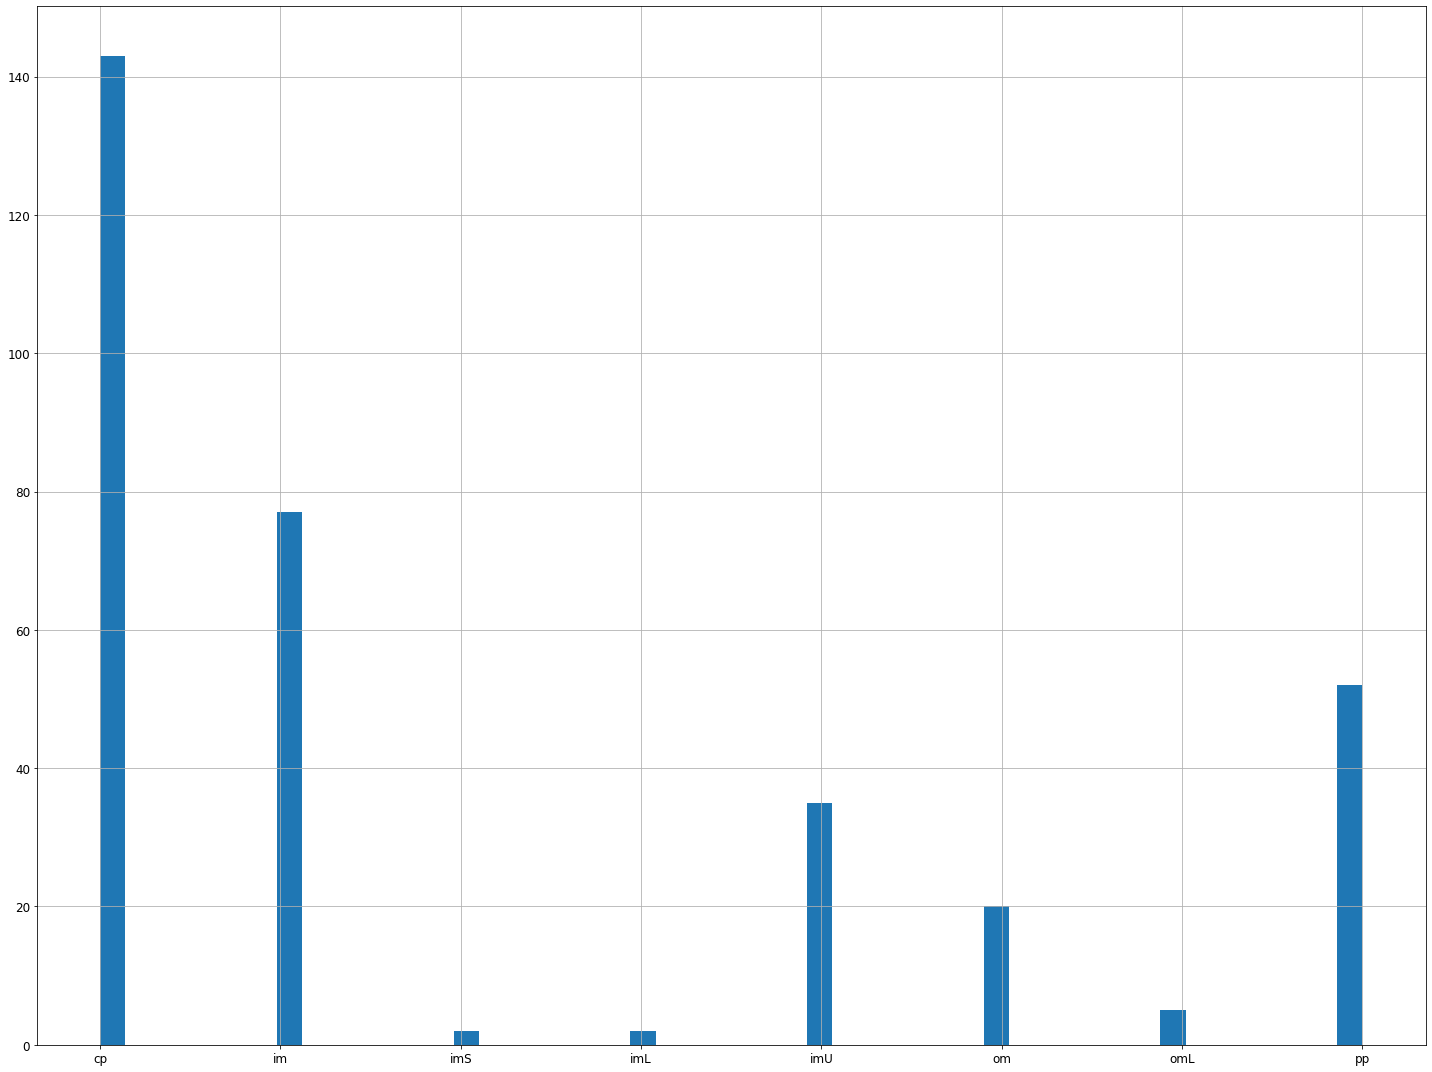

In [135]:
##Visualize the dataset
import matplotlib.pyplot as plt
data_set['Class'].hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Those two syntaxes above illustrated the numbers of class attributed in the data. There are 3 classes that have less than 10 instances in the data, which can lead to invalid dataset and unwanted result. I will delete those classes in the cleaning data section below.

## 3. Cleaning data

In [136]:
#Delete the rows with class less than 10. We have omL, imS, imL which is less than 10.
import pandas as pd
data_set = data_set[data_set.Class != "omL"]
data_set = data_set[data_set.Class != "imS"]
data_set = data_set[data_set.Class != "imL"]
data_set['Class'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
Name: Class, dtype: int64

I used data subset to discard those invalid values mentioned above in 'Class' column. Data set is clean now. We will turn to Preparing step for Classification.

## 4. Preparing data

In [137]:
#Split training set into training set and test set following the ratio (80/20)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_set, test_size = 0.2, random_state=42)

In [138]:
#Divided train_set and test_set into categorical and numerical set.
train_set_num = train_set.drop('Class', axis = 1)
train_set_cat = train_set["Class"]
test_set_num = test_set.drop('Class', axis = 1)
test_set_cat = test_set["Class"]

In [139]:
#Using StandardScaler to normalize the numeric data set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_num_tr = scaler.fit_transform(train_set_num)
test_set_num_tr = scaler.fit_transform(test_set_num)

## 5. Classification

###     1. SVM Classification

In [140]:
from sklearn.svm import SVC
x_train, y_train, x_test, y_test = train_set_num_tr, train_set_cat, test_set_num_tr, test_set_cat
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)
svm_y_pred = svm_clf.predict(x_test)

In [141]:
#This code shows the label of the confusion matrix above.
svm_clf.classes_

array(['cp', 'im', 'imU', 'om', 'pp'], dtype=object)

In [142]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
cfs_mx_svm = confusion_matrix(y_test, svm_y_pred)
cfs_mx_svm

array([[29,  0,  0,  0,  1],
       [ 1, 12,  2,  0,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Here are some comments about the confusion matrix:
- 29 values were correctly classified as "cp". 
- 12 values were correctly classified as "im".
- 4 values were correctly classified as "imU".
- 3 values were correctly classified as "om".
- 11 values were correctly classified as "pp".
- Read down to the "cp" row, 1 value should have been "pp" which was classified as "pp".
- For the "im" row, there are 3 values that should have been "cp"(1) and "imU"(2), but they were classified as "im".
- 2 values from "imU" row were classified as "imU", but they must have been in "im".
- There is no wrong classification in "om" row.
- 1 value was classified as "pp", but they must have been "cp".

Saving figure confusion_matrix_plot


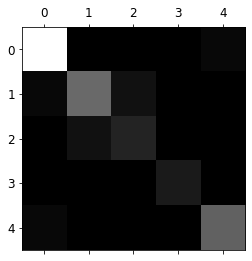

In [143]:
#Plotting confusion matrix
plt.matshow(cfs_mx_svm, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks quite good. Most images are lying at the main diagonal, which means that they were classified correctly. There are two blur squares that outside the main diagonal. Let have a look in "im" row, we can see that there are some images that wrongly classified as "im", but they should have been "imU". Similarly, "imU" row shows that some images are unprecisely classified as "imU", but they also should have been "im". The "imU" and "om" are slightly darker than others, this could be that fewer images appeared in the dataset or not performing classification as well on "imU" and "om" as others.

We should focus more on error by plotting the errors. We can compare the error rates by dividing each value in the confusion matrix by the numbers of images with the corresponding class. Those syntaxes below helps us doing it.

Saving figure confusion_matrix_errors_plot


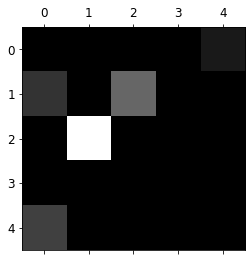

In [144]:
#Plotting errors.
row_sums = cfs_mx_svm.sum(axis=1, keepdims=True)
norm_conf_mx = cfs_mx_svm / row_sums

import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

The columns for class "cp" and "im", "imU" are quite bright, which means that some images are wrongly classified as "cp", "im", "imU". Besides, the rows for class "im", "imU" and "pp" are also quite bright, which shows that these classes are ofter confused with others. Otherwise, row from "cp" and "om" are all dark, which tells you that "cp" and "om" are classified correctly. 

In [145]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_y_pred)

0.8939393939393939

The accuracy is 89.39%, this ratio is really good when it can predicted classes correctly. 

In [146]:
#Compute F1-score
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test, svm_y_pred, average = 'macro')
svm_f1

0.8723478424722065

I used average = 'macro' because I wanted to measure F1 score for each individual label. F1-score tends to decrease and lower than accuracy score, but F1-score of SVM classification is still really good at 87.23%. 

### 2. SGD Classification

In [147]:
from sklearn import linear_model
sgd_clf = linear_model.SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train)
sgd_y_pred = sgd_clf.predict(x_test)

In [148]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
cfs_mx_sgd = confusion_matrix(y_test, sgd_y_pred)
cfs_mx_sgd

array([[30,  0,  0,  0,  0],
       [ 1, 14,  0,  0,  0],
       [ 0,  4,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 2,  1,  0,  0,  9]], dtype=int64)

Here are some comments about the confusion matrix:
- 30 values were correctly classified as "cp". 
- 14 values were correctly classified as "im".
- 2 values were correctly classified as "imU".
- 3 values were correctly classified as "om".
- 9 values were correctly classified as "pp".
- Read down to the "cp" row, there is not any wrong classification in this row.
- For the "im" row, there is 1 value that should have been "cp"(1), but they were classified as "im".
- 4 values from "imU" row were classified as "imU", but they must have been in "im".
- There is no wrong classification in "om" row.
- 3 values were classified as "pp", but they must have been "cp"(2) and "im"(1) respectively.

Saving figure confusion_matrix_plot


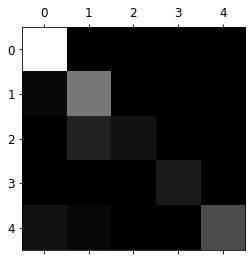

In [149]:
#Plotting confusion matrix
plt.matshow(cfs_mx_sgd, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks quite good. Most images are lying at the main diagonal, which means that they were classified correctly. There are some images appeared wrongly which are classified as "im" in "imU" row. The "imU" and "om" are slightly darker than others, this could be that fewer images appeared in the dataset or not performing classification as well on "imU" and "om" as others.

We should focus more on error by plotting the errors. We can compare the error rates by dividing each value in the confusion matrix by the numbers of images with the corresponding class. Those syntaxes below helps us doing it.

Saving figure confusion_matrix_errors_plot


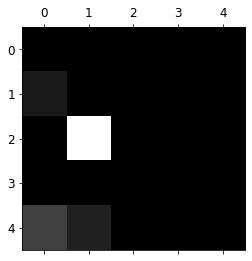

In [150]:
#Plotting errors
row_sums = cfs_mx_sgd.sum(axis=1, keepdims=True)
norm_conf_mx = cfs_mx_sgd / row_sums

import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

The columns for class "cp" and "im" are quite bright, which means that some images are wrongly classified as "cp", "im". Besides, the rows for class "im", "imU" are also quite bright, which shows that these classes are ofter confused with others. Otherwise, row from "cp" and "om" are all dark, which tells you that "cp" and "om" are classified correctly. 

In [151]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sgd_y_pred)

0.8787878787878788

The accuracy is 87.88%, this ratio is really good when it can predicted classes correctly. 

In [152]:
#Compute F1-score
from sklearn.metrics import f1_score
sgd_f1 = f1_score(y_test, sgd_y_pred, average = 'macro')
sgd_f1

0.826610644257703

The F1-score of SGD classification looks like the same as SVM that it tends to decrease and lower than accuracy score.
F1-score of SGD classification is 82.66% which could be still good enough with this rate.

###  3. Logistics Regression Classification

In [153]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(random_state = 42)
log_reg_clf.fit(x_train, y_train)
log_reg_y_pred = log_reg_clf.predict(x_test)

In [154]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
cfs_mx_log = confusion_matrix(y_test, log_reg_y_pred)
cfs_mx_log

array([[30,  0,  0,  0,  0],
       [ 1, 13,  1,  0,  0],
       [ 0,  1,  4,  0,  1],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Here are some comments about the confusion matrix:
- 30 values were correctly classified as "cp". 
- 13 values were correctly classified as "im".
- 4 values were correctly classified as "imU".
- 3 values were correctly classified as "om".
- 11 values were correctly classified as "pp".
- Read down to the "cp" row, there is not any wrong classification in this row.
- For the "im" row, there are 2 values that should have been "cp"(1) and "imU"(1), but they were classified as "im".
- 2 values from "imU" row were classified as "imU", but they must have been in "im"(1) and "pp"(1) respectively.
- There is no wrong classification in "om" row.
- 1 value were classified as "pp", but they must have been "cp".

Saving figure confusion_matrix_plot


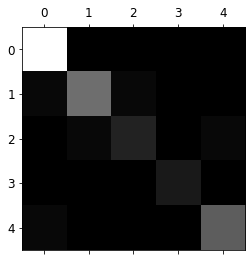

In [155]:
#Plotting confusion matrix
plt.matshow(cfs_mx_log, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks quite good. Most images are lying at the main diagonal, which means that they were classified correctly. The "imU" and "om" are slightly darker than others, this could be that fewer images appeared in the dataset or not performing classification as well on "imU" and "om" as others.

We should focus more on error by plotting the errors. We can compare the error rates by dividing each value in the confusion matrix by the numbers of images with the corresponding class. Those syntaxes below helps us doing it.

Saving figure confusion_matrix_errors_plot


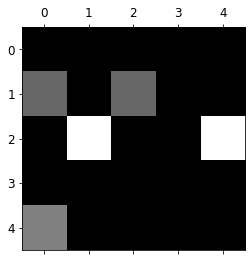

In [156]:
#PLotting errors.
row_sums = cfs_mx_log.sum(axis=1, keepdims=True)
norm_conf_mx = cfs_mx_log / row_sums

import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

The columns for class "cp", "im", "imU" and "pp" are quite bright, which means that some images are wrongly classified as "cp", "im", "imU" and "pp". Besides, the rows for class "im", "imU" and "pp" are also quite bright, which shows that these classes are ofter confused with others. Otherwise, row from "cp" and "om" are all dark, which tells you that "cp" and "om" are classified correctly in this case.

In [157]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_reg_y_pred)

0.9242424242424242

The accuracy of Logistics Regression Classification is 92.42%, this ratio is excellent (>90%) when it can predicted classes correctly. 

In [158]:
#Compute F1-score
from sklearn.metrics import f1_score
log_f1 = f1_score(y_test, log_reg_y_pred, average = 'macro')
log_f1

0.9016466107122392

The F1-score of SGD classification looks like the same as SVM and SGD that it tends to decrease and lower than accuracy score.
F1-score of SGD classification is 90.16 (>90%) which could be a perfect rate to predict correctly.

###  4. Voting Classification

There are two types of doing Voting Classification such as Hard Voting Classification and Soft Voting Classification. This Voting Classifier comprises three individual classifiers such as SVM, Logistics Regression and SGD classifier. With Hard Voting Classification, I used default hyperparameters for all classifiers to get the performance. Otherswise, with Soft Classification, I used hyperparameter Probability = "True" in SVM Classifier, and used loss = "log" in SGD Classifer to do Soft Classification.

#### 1. Hard Voting Classification

In [159]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

log_clf = LogisticRegression(random_state = 42)
svm_clf = SVC(random_state = 42)
sgd_clf = linear_model.SGDClassifier(random_state = 42)

voting_clf_hard = VotingClassifier(estimators = [('lr', log_clf), ('svc', svm_clf), ('sgd',sgd_clf)], voting = 'hard')
voting_clf_hard.fit(x_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  dec...
                                            class_weight=None,
            

In [160]:
#Compute accuracy score
from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, sgd_clf, voting_clf_hard):
    clf.fit(x_train, y_train)
    vot_y_pred_hard = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, vot_y_pred_hard))

LogisticRegression 0.9242424242424242
SVC 0.8939393939393939
SGDClassifier 0.8787878787878788
VotingClassifier 0.9242424242424242


In [161]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
cfs_mx_vot_hard = confusion_matrix(y_test, vot_y_pred_hard)
cfs_mx_vot_hard

array([[30,  0,  0,  0,  0],
       [ 1, 13,  1,  0,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Here are some comments about the confusion matrix:
- 30 values were correctly classified as "cp". 
- 13 values were correctly classified as "im".
- 4 values were correctly classified as "imU".
- 3 values were correctly classified as "om".
- 11 values were correctly classified as "pp".
- Read down to the "cp" row, there is not any wrong classification in this row.
- For the "im" row, there are 2 values that should have been "cp"(1) and "imU"(1), but they were classified as "im".
- 2 values from "imU" row were classified as "imU", but they must have been in "im"(1) and "pp"(1) respectively.
- There is no wrong classification in "om" row.
- 1 value were classified as "pp", but they must have been "cp".

Saving figure confusion_matrix_plot


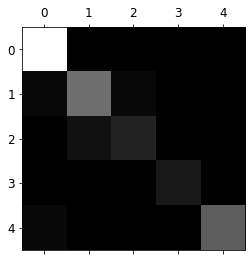

In [162]:
#Plotting confusion matrix
plt.matshow(cfs_mx_vot_hard, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks quite good. Most images are lying at the main diagonal, which means that they were classified correctly. There are some images appeared wrongly which are classified as "im" in "imU" row, but this could not affect much because the square outside the main diagonal is too blur. The "imU" and "om" are slightly darker than others, this could be that fewer images appeared in the dataset or not performing classification as well on "imU" and "om" as others.

Saving figure confusion_matrix_errors_plot


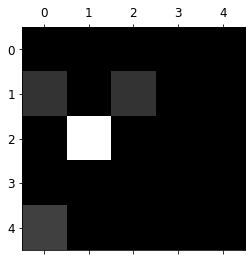

In [163]:
#Plotting errors
row_sums = cfs_mx_vot_hard.sum(axis=1, keepdims=True)
norm_conf_mx = cfs_mx_vot_hard / row_sums

import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

The columns for class "cp", "im", "imU" are quite bright, which means that some images are wrongly classified as "cp", "im", "imU" and "pp". Besides, the rows for class "im", "imU" and "pp" are also quite bright, which shows that these classes are ofter confused with others. Otherwise, row from "cp" and "om" are all dark, which tells you that "cp" and "om" are classified correctly in this case.

In [164]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, vot_y_pred_hard)

0.9242424242424242

The accuracy of Hard Voting Classification is 92.42%, this ratio is excellent (>90%) when it can predicted classes correctly. 

In [165]:
from sklearn.metrics import f1_score
vot_hard_f1 = f1_score(y_test, vot_y_pred_hard, average = 'macro')
vot_hard_f1

0.9036406137107399

The F1-score of Hard Voting Classification looks like the same as SVM, Logistics Regression and SGD because it tends to decrease and be lower than accuracy score.
F1-score of Hard Voting Classification classification is 90.16 (>90%) which could be a perfect rate to predict correctly.

#### 2. Soft Voting Classification

In [166]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

log_clf = LogisticRegression(random_state = 42)
svm_clf = SVC(probability =True, random_state = 42)
sgd_clf = linear_model.SGDClassifier(loss ='log',random_state = 42)

voting_clf_soft = VotingClassifier(estimators = [('lr', log_clf), ('svc', svm_clf), ('sgd',sgd_clf)], voting = 'soft')
voting_clf_soft.fit(x_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  dec...
                                            class_weight=None,
            

In [167]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, sgd_clf, voting_clf_soft):
    clf.fit(x_train, y_train)
    vot_y_pred_soft = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, vot_y_pred_soft))

LogisticRegression 0.9242424242424242
SVC 0.8939393939393939
SGDClassifier 0.8636363636363636
VotingClassifier 0.9090909090909091


In [168]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
cfs_mx_vot_soft = confusion_matrix(y_test, vot_y_pred_soft)
cfs_mx_vot_soft

array([[30,  0,  0,  0,  0],
       [ 1, 12,  2,  0,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

Here are some comments about the confusion matrix:
- 30 values were correctly classified as "cp". 
- 13 values were correctly classified as "im".
- 4 values were correctly classified as "imU".
- 3 values were correctly classified as "om".
- 11 values were correctly classified as "pp".
- Read down to the "cp" row, there is not any wrong classification in this row.
- For the "im" row, there are 3 values that should have been "cp"(1) and "imU"(2), but they were classified as "im".
- 2 values from "imU" row were classified as "imU", but they must have been in "im"(2).
- There is no wrong classification in "om" row.
- 1 value were classified as "pp", but they must have been "cp".

Saving figure confusion_matrix_plot


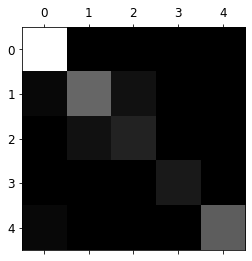

In [169]:
#Plotting the confusion matrix
plt.matshow(cfs_mx_vot_soft, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks quite good. Most images are lying at the main diagonal, which means that they were classified correctly. There are two blur squares that outside the main diagonal. Let have a look in "im" row, we can see that there are some images that wrongly classified as "im", but they should have been "imU". Similarly, "imU" row shows that some images are unprecisely classified as "imU", but they also should have been "im". The "imU" and "om" are slightly darker than others, this could be that fewer images appeared in the dataset or not performing classification as well on "imU" and "om" as others.

Saving figure confusion_matrix_errors_plot


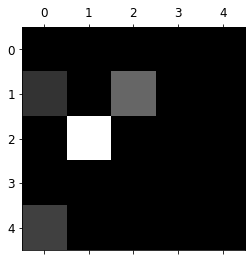

In [170]:
#Plotting the errors
row_sums = cfs_mx_vot_soft.sum(axis=1, keepdims=True)
norm_conf_mx = cfs_mx_vot_soft / row_sums

import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

The columns for class "cp", "im", "imU" are quite bright, which means that some images are wrongly classified as "cp", "im", "imU" and "pp". Besides, the rows for class "im", "imU" and "pp" are also quite bright, which shows that these classes are ofter confused with others. Otherwise, row from "cp" and "om" are all dark, which tells you that "cp" and "om" are classified correctly in this case.

In [171]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, vot_y_pred_soft)

0.9090909090909091

The accuracy of Soft Voting Classification is 90.91%, this ratio is excellent (>90%) when it can predicted classes correctly. 

In [172]:
#Compute F1-score
from sklearn.metrics import f1_score
vot_soft_f1 = f1_score(y_test, vot_y_pred_soft, average = 'macro')
vot_soft_f1

0.8837033096355048

The F1-score of Hard Voting Classification looks like the same as SVM, Logistics Regression, SGD and Hard Voting because it tends to decrease and be lower than accuracy score.
F1-score of Soft Voting Classification classification is 88.37% which could be nearly perfect rate (>= 90%) to predict correctly.

## 6. Conclusion

|    Classification    | Accuracy score | F1-score |
|:--------------------:|:--------------:|:--------:|
|          SVM         |     89.39%     |  87.23%  |
|          SGD         |     87.88%     |  82.66%  |
| Logistics Regression |     92.42%     |  90.16%  |
|      Hard Voting     |     92.42%     |  90.36%  |
|      Soft Voting     |     90.91%     |  88.37%  |
|   SGD - loss= 'log'  |     86.36%     |  85.13%  |

As we can see, all Accuracy score and F1-score of all classifiers are above 80%, which seems to be good rates for correct prediction. Firstly, SGD Classifier got the lowest score for Accuracy and F1 which are 87.88% and 82.66% respectively. Secondly, Logistics Regression and Hard Voting got the same Accuracy score which is 92.42% and different F1-score such as 90.16% and 90.36% respectively.
- All F1-score of 4 classifiers are lower than Accuracy score, which means that my dataset has balanced classes.
- When I changed hyperparameter of SGD loss ="log", the prediction rate decreased to 86.36%.

=> Hard Voting Classifier is the best classification for this data set.